In [1]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
import pandas as pd
import matplotlib.pyplot as plt
import sys
from pathlib import Path 
# Append the src directory to sys.path
sys.path.append(str(Path.cwd().parent / "src"))

from config import *


In [ ]:
# Charger les donnees traitees
data = pd.read_csv(PROCESSED_DATA_FILE)

# Selectionner les features (criteres ESG) et la cible (performance boursieres)
X = data[['Environment Risk Score', 'Governance Risk Score', 'Social Risk Score']]

# Définir la variable cible (remplacer 'Stock Performance' par une autre métrique)
if 'Calculated ESG Score' in data.columns:
    y = data['Calculated ESG Score']  # Remplacement temporaire
    print("Utilisation de 'Calculated ESG Score' comme cible")
else:
    raise KeyError("La colonne 'Stock Performance' ou une alternative n'est pas présente dans le dataset.")

# Diviser les donnees en donnees d'entrainement et de test (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialiser le model RandomForestRegressor
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)

# Entrainer le model
rf_model.fit(X_train, y_train)

# Predire les performances boursieres sur les donnees de test
y_pred = rf_model.predict(X_test)

# Calculer l'erreur quadratique moyenne (MSE)
mse = mean_squared_error(y_test, y_pred)
print(f'Mean Squared Error: {mse}')


# Afficher l'importance des features
importances = rf_model.feature_importances_
feature_names = X.columns


Index(['Symbol', 'Name', 'Address', 'Full Time Employees', 'Description',
       'Total ESG Risk Score', 'Environment Risk Score',
       'Governance Risk Score', 'Social Risk Score', 'Controversy Score',
       ...
       'ESG Risk Level_Low', 'ESG Risk Level_Medium',
       'ESG Risk Level_Negligible', 'ESG Risk Level_Severe',
       'ESG Risk Level_Unknown', 'Sector', 'Normalized Environment Risk Score',
       'Normalized Governance Risk Score', 'Normalized Social Risk Score',
       'Calculated ESG Score'],
      dtype='object', length=154)
Utilisation de 'Calculated ESG Score' comme cible
Mean Squared Error: 0.00033270058194583544


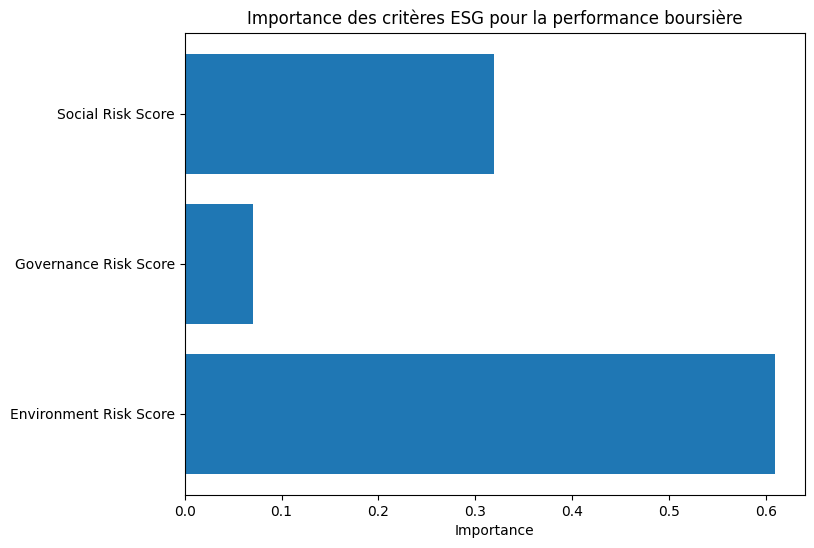

In [ ]:
# Visualiser l'importance des variables
plt.figure(figsize=(8, 6))
plt.barh(feature_names, importances)
plt.xlabel('Importance')
plt.title('Importance des critères ESG dans la prédiction du score ESG')
plt.show()


In [6]:
# Sauvegarder le modèle
import joblib
model_file = 'random_forest_esg_model.pkl'
joblib.dump(rf_model, model_file)
print(f"Le modèle a été enregistré dans {model_file}")


Le modèle a été enregistré dans random_forest_esg_model.pkl
